In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_csv("vendas_limpo.csv")

# 🧹 Garante que está trabalhando com uma cópia segura do DataFrame
df = df.copy()

# 🧩 Cria uma nova coluna com Produto + Pagamento
df.loc[:, 'item'] = df['produto'].astype(str).str.strip() + ' | ' + df['pagamento'].astype(str).str.strip()

# 🛒 Agrupa por compra (id_da_compra), gerando listas de itens por transação
transacoes = df.groupby('id_da_compra')['item'].apply(list).tolist()

# 🔄 Transforma as transações para formato binário (necessário para FP-Growth)
te = TransactionEncoder()
df_bin = pd.DataFrame(te.fit(transacoes).transform(transacoes), columns=te.columns_)

# ⛏️ Executa FP-Growth para encontrar conjuntos frequentes
min_support_value = 0.02  # Suporte mínimo de 2%
frequentes = fpgrowth(df_bin, min_support=min_support_value, use_colnames=True)

# 🔗 Gera regras de associação com confiança mínima de 50%
min_confidence_value = 0.5  # Confiança mínima de 50%
regras = association_rules(frequentes, metric="confidence", min_threshold=min_confidence_value)

# 🔍 Exibe as 10 regras com maior lift (maior poder de associação)
regras_ordenadas = regras[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

# Mostra as 10 regras mais fortes
print("Top 10 regras com maior lift:")
print(regras_ordenadas.head(10))



Top 10 regras com maior lift:
                                   antecedents  \
10     (refrigerante | transferência bancária)   
11  (suco de laranja | transferência bancária)   
7                         (refrigerante | pix)   
8                      (suco de laranja | pix)   
13          (papel toalha | cartão de crédito)   
12          (desinfetante | cartão de crédito)   
31                        (papel toalha | pix)   
30                        (desinfetante | pix)   
33     (papel toalha | transferência bancária)   
32     (desinfetante | transferência bancária)   

                                   consequents   support  confidence  \
10  (suco de laranja | transferência bancária)  0.020683    0.552538   
11     (refrigerante | transferência bancária)  0.020683    0.570575   
7                      (suco de laranja | pix)  0.021567    0.560659   
8                         (refrigerante | pix)  0.021567    0.575111   
13          (desinfetante | cartão de crédito)  0.039817   

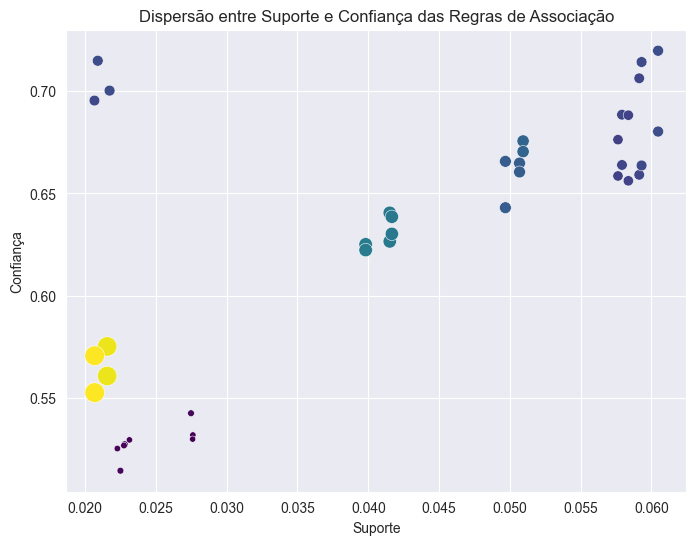

In [5]:
# 📊 Visualização das regras: dispersão entre suporte e confiança, colorindo pelo lift
plt.figure(figsize=(8,6))
sns.scatterplot(data=regras, x='support', y='confidence', hue='lift', size='lift', sizes=(20, 200), palette="viridis", legend=None)
plt.title("Dispersão entre Suporte e Confiança das Regras de Associação")
plt.xlabel("Suporte")
plt.ylabel("Confiança")
plt.show()
